# Курсовая работа № 2
## Аналитика. Начальный уровень

Курсовая работа состоит из двух частей – обязательной и дополнительной. **Для зачета необходимо выполнение только первой части.** Выполнение второй части может потребовать дополнительные знания Python.

- [Часть первая](#Часть-первая)
- [Часть вторая](#Часть-вторая)

## Часть первая


Перед вами стоит задача – подготовить аналитический отчет для HR-отдела. На основании проведенной аналитики предполагается составить рекомендации для отдела кадров по стратегии набора персонала, а также по взаимодействию с уже имеющимися сотрудниками.
<br><br> В базе данных лежит набор таблиц, которые содержат данные о сотрудниках вымышленной компании.
Сделайте обзор штата сотрудников компании. Составьте набор предметов исследования, а затем проверьте их на данных. Вся аналитика должна быть выполена с помощью SQL. Впоследствии данные можно визуализировать, однако финальные датафреймы для графиков также должны быть подготовлены с помощью SQL. <br><br>

Примеры гипотез:
1. Есть зависимость между `perfomance score` и тем, под чьим руководством работает сотрудник.
2. Есть зависимость между продолжительностью работы в компании и семейным положением сотрудника.
2. Есть зависимость между продолжительностью работы в компании и возрастом сотрудника.

<br><br>
Параметры для подключения следующие: хост – `dsstudents.skillbox.ru`, порт – `5432`, имя базы данных – `human_resources`, пользователь – `readonly`, пароль – `6hajV34RTQfmxhS`. Таблицы, доступные для анализа, – `hr_dataset`, `production_staff`, `recruting_costs`, `salary_grid`.

In [160]:
### YOUR CODE HERE ###

# Создаем соединение с базой данных
import psycopg2
import pandas as pd
import sqlite3

pg_connection = {
    "host": "dsstudents.skillbox.ru",
    "port": 5432,
    "dbname": "human_resources",
    "user": "readonly",
    "password": "6hajV34RTQfmxhS"
}
conn = psycopg2.connect(**pg_connection)
cursor = conn.cursor()
# conn.commit()

In [167]:
# Смотрим таблицу hr_dataset
df_hr = pd.read_sql_query("select * from hr_dataset;", conn)
df_hr.sort_values('Employee Name').head(10)

,id,Employee Name,Employee Number,marriedid,maritalstatusid,genderid,empstatus_id,deptid,perf_scoreid,age,...,Date of Hire,Days Employed,Date of Termination,Reason For Term,Employment Status,department,position,Manager Name,Employee Source,Performance Score
67,68,"Adinolfi, Wilson K",1409070522,0,0,1,1,5,4,34,...,2011-07-05,2336,None,N/A - still employed,Active,Production,Production Technician I,Michael Albert,MBTA ads,Exceeds
43,44,"Ait Sidi, Karthikeyan",1307060199,1,1,1,5,3,3,43,...,2015-03-30,444,2016-06-16,career change,Voluntarily Terminated,IT/IS,Sr. DBA,Simon Roup,Company Intranet - Partner,Fully Meets
203,204,"Akinkuolie, Sarah",1005019209,1,1,0,5,5,0,29,...,2011-07-05,447,2012-09-24,hours,Voluntarily Terminated,Production,Production Technician II,Kissy Sullivan,Newspager/Magazine,90-day meets
68,69,"Alagbe,Trina",1011022883,1,1,0,1,5,3,29,...,2008-01-07,3611,None,N/A - still employed,Active,Production,Production Technician I,Elijiah Gray,Billboard,Fully Meets
53,54,"Albert, Michael",1501072311,0,2,1,1,5,3,49,...,2011-08-01,2309,None,N/A - still employed,Active,Production,Production Manager,Janet King,Employee Referral,Fully Meets
69,70,"Anderson, Carol",1001417624,0,2,0,5,5,9,28,...,2011-07-11,57,2011-09-06,return to school,Voluntarily Terminated,Production,Production Technician I,Webster Butler,Word of Mouth,N/A- too early to review
70,71,"Anderson, Linda",1304055947,0,0,0,1,5,5,41,...,2012-01-09,2148,None,N/A - still employed,Active,Production,Production Technician I,Amy Dunn,MBTA ads,Exceptional
291,292,"Andreola, Colby",1107027358,0,0,0,1,4,3,39,...,2014-11-10,1112,None,N/A - still employed,Active,Software Engineering,Software Engineer,Alex Sweetwater,Vendor Referral,Fully Meets
71,72,"Athwal, Sam",1301052124,0,4,1,1,5,9,35,...,2013-09-30,1518,None,N/A - still employed,Active,Production,Production Technician I,Ketsia Liebig,Employee Referral,N/A- too early to review
72,73,"Bachiochi, Linda",1212051409,0,0,0,3,5,3,48,...,2009-07-06,3065,None,N/A - still employed,Leave of Absence,Production,Production Technician I,Brannon Miller,Diversity Job Fair,Fully Meets


In [29]:
# Делаем запрос на количество строк в таблице hr_dataset
# для подсчета общего количества сотрудников
sql_str = "SELECT count(*) FROM public.hr_dataset;"
cursor.execute(sql_str)
staff = [a for a in cursor.fetchall()][0][0]
# conn.commit()

# Запрашиваем статус сотрудников и делаем сортировку по убыванию 
sql_str = r'SELECT "Employment Status", count("Employment Status") as c, count("Employment Status")*100/{} FROM public.hr_dataset GROUP BY "Employment Status" ORDER BY c DESC;'.format(staff)
# sql_str = r'SELECT count("Employment Status")/{} FROM public.hr_dataset;'.format(staff)
cursor.execute(sql_str)
status_staff = [a for a in cursor.fetchall()]
# status_staff_1 = float(status_staff[0][2])
# print(status_staff_1)

print("Общее количество сотрудников: %s" % staff)
print("Статус сотрудников и их количество: %s" % status_staff)

# Выводим данные в датафрейме по убыванию
df_staff = pd.DataFrame(status_staff, columns=['status', 'count', 'percentage']).sort_values('count', ascending=False)
# df_staff = pd.DataFrame(status_staff, columns=['status'])
# df_staff.loc[:, 'percentage'] = round(df_staff.loc[:, 'count'] / staff * 100, 2)
df_staff

Общее количество сотрудников: 310
Статус сотрудников и их количество: [('Active', 183, 59), ('Voluntarily Terminated', 88, 28), ('Terminated for Cause', 14, 4), ('Leave of Absence', 14, 4), ('Future Start', 11, 3)]


,status,count,percentage
0,Active,183,59
1,Voluntarily Terminated,88,28
2,Terminated for Cause,14,4
3,Leave of Absence,14,4
4,Future Start,11,3


# Вывод
1. Общее количество сотрудников бывших и работающих: 310 человек.
2. Из них 183 чел. или 59% от общей численности таблицы, являются работающими (без учета Future Start и отпускников).
3. 88 чел. или 28% уволились по собственному желанию.
4. 14 чел. или 4% были уволены по различным причинам.
5. Еще 14 чел. сейчас находятся в отпуске.
6. 11 чел. или 3% кадровый резерв на повышение.

# Анализ работающих сотрудников

## 1. Анализ сотрудников со статусами "Active" , "Leave of Absence", "Future Start"

In [226]:
# Создаем соединение с базой данных
import psycopg2
import pandas as pd
import sqlite3

pg_connection = {
    "host": "dsstudents.skillbox.ru",
    "port": 5432,
    "dbname": "human_resources",
    "user": "readonly",
    "password": "6hajV34RTQfmxhS"
}
conn = psycopg2.connect(**pg_connection)
cursor = conn.cursor()
# conn.commit()

# Выводим минимальный, средний и максимальный возраст работающих сотрудников.
# Средний возраст округляем до 0 знаков после запятой.
sql_str = '''SELECT min(age), avg(age), max(age) FROM public.hr_dataset 
WHERE "Employment Status" = 'Active' 
OR "Employment Status" = 'Leave of Absence' 
OR "Employment Status" = 'Future Start';'''
cursor.execute(sql_str)
age = [a for a in cursor.fetchall()]
print(r'Минимальный {} лет, средний {} лет, максимальный {} лет -  возраст работающих сотрудников'
      .format(age[0][0], round(age[0][1], 0), age[0][2]))

Минимальный 25 лет, средний 38 лет, максимальный 67 лет -  возраст работающих сотрудников


## 2. Анализ работающих мужчин и женщин в разрезе департаментов

In [210]:
# Создаем соединение с базой данных
import psycopg2
import pandas as pd
import sqlite3

pg_connection = {
    "host": "dsstudents.skillbox.ru",
    "port": 5432,
    "dbname": "human_resources",
    "user": "readonly",
    "password": "6hajV34RTQfmxhS"
}
conn = psycopg2.connect(**pg_connection)
cursor = conn.cursor()

sql_str = '''SELECT department, sex, count(*), avg("Days Employed") 
            FROM public.hr_dataset 
            WHERE "Employment Status" = 'Active' 
            or "Employment Status" = 'Leave of Absence'
            or "Employment Status" = 'Future Start'
            GROUP BY sex, department 
            ORDER BY department;'''
cursor.execute(sql_str)
share_mf = [a for a in cursor.fetchall()]
# print(share_mf)

# Выводим данные в датафрейме
marks = ['department', 'sex', 'count', 'avg_days']
df_staff_share = pd.DataFrame(share_mf, columns=marks)

# Меняем тип данный у одного столбца: среднее время работы в компании
# df_staff_share.loc[:, 'avg_days'] = df_staff_share.loc[:, 'avg_days'].apply(lambda x: int(x)) так тоже работает
df_staff_share.loc[:, 'avg_days'] = df_staff_share.loc[:, 'avg_days'].map(int)
df_staff_share

,department,sex,count,avg_days
0,Admin Offices,Female,5,1715
1,Admin Offices,Male,3,1088
2,Executive Office,Female,1,1973
3,IT/IS,Male,21,1010
4,IT/IS,Female,19,1241
5,Production,Female,76,1638
6,Production,Male,49,1667
7,Sales,Male,15,1714
8,Sales,Female,12,1733
9,Software Engineering,Male,2,1766


In [217]:
# Создаем соединение с базой данных
import psycopg2
import pandas as pd
import sqlite3

pg_connection = {
    "host": "dsstudents.skillbox.ru",
    "port": 5432,
    "dbname": "human_resources",
    "user": "readonly",
    "password": "6hajV34RTQfmxhS"
}
conn = psycopg2.connect(**pg_connection)
cursor = conn.cursor()
# conn.commit()

sql_str = r'''SELECT count(*) 
            FROM public.hr_dataset 
            WHERE "Employment Status" = 'Active' 
            or "Employment Status" = 'Leave of Absence'
            or "Employment Status" = 'Future Start';'''
cursor.execute(sql_str)
staff_active = [a for a in cursor.fetchall()][0][0]
print(r'Общее количество работающих сотрудников: {} человека'.format(staff_active))
# conn.commit()

sql_str = '''SELECT department, count(*), round(count(*)*100/{},2)
            FROM public.hr_dataset 
            WHERE "Employment Status" = 'Active' or "Employment Status" = 'Leave of Absence'
            or "Employment Status" = 'Future Start'
            GROUP BY department 
            ORDER BY department;'''.format(float(staff_active))

cursor.execute(sql_str)
staff_act = [a for a in cursor.fetchall()]

# Выводим данные в датафрейме
marks = ['department', 'count', '%']
df_staff_active = pd.DataFrame(staff_act, columns=marks)

df_staff_active

Общее количество работающих сотрудников: 208 человека


,department,count,%
0,Admin Offices,8,3.85
1,Executive Office,1,0.48
2,IT/IS,40,19.23
3,Production,125,60.10
4,Sales,27,12.98
5,Software Engineering,7,3.37


## Вывод
1. Общее количество работающих сотрудников, включая, находящихся в отпуске 208 человек.
2. Возраст работающих сотрудников находится в пределах от 25 лет до 67 лет. Средний составляет: 38 лет, что свидетельствует о достаточно молодом коллективе компании.
3. Наибольшее количество сотрудников работают в трех департаментах: Production (125 человек), IT/IS (40 человек) и Sales (27 человек), что составляет почти 93% всех работающих сотрудников.
4. В департаменте IT/IS наблюдается минимальный средний срок работы среди мужчин - 1010 дней. Данный показатель почти на 20% меньше, чем у женщин (1241 дней) этого отдела.
3. В департаменте Admin Offices наблюдается значительное расхождение между мужчинами и женщинами по среднему сроку работы. У мужчин он составляет 1088 дней, против 1715 дней у женщин.
4. По остальным департаментам сильных расхождений не наблюдается.

## 3. Информация по сотрудникам Admin Offices

In [220]:
# Создаем соединение с базой данных
import psycopg2
import pandas as pd
import sqlite3

pg_connection = {
    "host": "dsstudents.skillbox.ru",
    "port": 5432,
    "dbname": "human_resources",
    "user": "readonly",
    "password": "6hajV34RTQfmxhS"
}
conn = psycopg2.connect(**pg_connection)
cursor = conn.cursor()

sql_str = '''SELECT id, "Employee Name", sex, age, "Pay Rate", "Days Employed", position, "Manager Name"
            FROM public.hr_dataset 
            WHERE ("Employment Status" = 'Active' AND department = 'Admin Offices')
            OR ("Employment Status" = 'Leave of Absence' AND department = 'Admin Offices')
            OR ("Employment Status" = 'Future Start' AND department = 'Admin Offices')
            ORDER BY "Days Employed";
            '''
cursor.execute(sql_str)
adm_staff = [a for a in cursor.fetchall()]
# print(adm_staff)

# Выводим данные в датафрейме
marks = ['id', 'employee_name', 'sex', 'age', 'pay_rate', 'days_employed', 'position', 'manager_name']
df_adm_staff = pd.DataFrame(adm_staff, columns=marks)

df_adm_staff

,id,employee_name,sex,age,pay_rate,days_employed,position,manager_name
0,4,"Howard, Estelle",Female,32,21.50,58,Administrative Assistant,Brandon R. LeBlanc
1,7,"LeBlanc, Brandon R",Male,33,55.00,691,Shared Services Manager,Janet King
2,5,"Singh, Nan",Female,30,16.56,940,Administrative Assistant,Brandon R. LeBlanc
3,9,"Boutwell, Bonalyn",Female,31,34.95,1014,Sr. Accountant,Brandon R. LeBlanc
4,3,"Steans, Tyrone",Male,31,29.00,1154,Accountant I,Brandon R. LeBlanc
5,2,"LaRotonda, William",Male,34,23.00,1420,Accountant I,Brandon R. LeBlanc
6,10,"Foster-Baker, Amy",Female,39,34.95,3247,Sr. Accountant,Board of Directors
7,1,"Brown, Mia",Female,30,28.50,3317,Accountant I,Brandon R. LeBlanc


## Вывод
1. В департаменте Admin Offices работают 8 человек (3 мужчины и 5  женщин).
2. Согласно часовой ставки, данный персонал не является высокооплачиваемым, за исключением руководителя.
3. Продолжительность работы находится в широком диапазоне: 58 - 3317 дней.
4. Низкий показатель среднего времени работы в компании по мужчинам подразделения Admin Offices связан с низким значением работы по одному из трех сотрудников, который является самым высокооплачиваемым среди них. Но даже если не принимать во внимание расчета среднего его данные, средняя продолжительность работы у мужчин все равно значительно ниже, чем у женщин этого департамента.

## 4. Информация по мужчинам IT/IS

In [214]:
# Создаем соединение с базой данных
import psycopg2
import pandas as pd
import sqlite3

pg_connection = {
    "host": "dsstudents.skillbox.ru",
    "port": 5432,
    "dbname": "human_resources",
    "user": "readonly",
    "password": "6hajV34RTQfmxhS"
}
conn = psycopg2.connect(**pg_connection)
cursor = conn.cursor()

# Анализ мужчин IT департамента
sql_str = '''SELECT id, "Employee Name", age, "Pay Rate", "Days Employed", position, "Manager Name"
            FROM public.hr_dataset 
            WHERE ("Employment Status" = 'Active' AND department = 'IT/IS' AND sex = 'Male') 
            OR ("Employment Status" = 'Leave of Absence' AND department = 'IT/IS' AND sex = 'Male')
            OR ("Employment Status" = 'Future Start' AND department = 'IT/IS' AND sex = 'Male');
            '''
cursor.execute(sql_str)
share_male_it = [a for a in cursor.fetchall()]
# print(share_male_it)


# Выводим данные в датафрейме
marks = ['id', 'employee_name', 'age', 'pay_rate', 'days_employed', 'position', 'manager_name']
df_staff_male_it = pd.DataFrame(share_male_it, columns=marks)

df_staff_male_it

,id,employee_name,age,pay_rate,days_employed,position,manager_name
0,18,"Murray, Thomas",29,35.50,1112,Database Administrator,Simon Roup
1,22,"Rogers, Ivan",31,42.20,972,Database Administrator,Simon Roup
2,24,"Simard, Kramer",48,30.20,1056,Database Administrator,Simon Roup
3,26,"Foss, Jason",37,65.00,2417,IT Director,Jennifer Zamora
4,27,"Roup,Simon",45,62.00,1771,IT Manager - DB,Jennifer Zamora
5,29,"Monroe, Peter",31,63.00,2111,IT Manager - Infra,Jennifer Zamora
6,30,"Dougall, Eric",47,64.00,1421,IT Manager - Support,Jennifer Zamora
7,31,"Clayton, Rick",32,28.99,1908,IT Support,Eric Dougall
8,35,"Bacong, Alejandro",30,45.00,1056,Network Engineer,Peter Monroe
9,36,"Cisco, Anthony",28,42.00,972,Network Engineer,Peter Monroe


## 5. Информация по женщинам IT/IS

In [215]:
# Создаем соединение с базой данных
import psycopg2
import pandas as pd
import sqlite3

pg_connection = {
    "host": "dsstudents.skillbox.ru",
    "port": 5432,
    "dbname": "human_resources",
    "user": "readonly",
    "password": "6hajV34RTQfmxhS"
}
conn = psycopg2.connect(**pg_connection)
cursor = conn.cursor()

# Анализ женщин IT департамента
sql_str = '''SELECT id, "Employee Name", age, "Pay Rate", "Days Employed", position, "Manager Name"
            FROM public.hr_dataset 
            WHERE ("Employment Status" = 'Active' AND department = 'IT/IS' AND sex = 'Female') 
            OR ("Employment Status" = 'Leave of Absence' AND department = 'IT/IS' AND sex = 'Female')
            OR ("Employment Status" = 'Future Start' AND department = 'IT/IS' AND sex = 'Female');
            '''
cursor.execute(sql_str)
share_female_it = [a for a in cursor.fetchall()]
# print(share_female_it)


# Выводим данные в датафрейме
marks = ['id', 'employee_name', 'age', 'pay_rate', 'days_employed', 'position', 'manager_name']
df_staff_female_it = pd.DataFrame(share_female_it, columns=marks)

df_staff_female_it

,id,employee_name,age,pay_rate,days_employed,position,manager_name
0,12,"Zamora, Jennifer",38,65.00,2787,CIO,Janet King
1,16,"Horton, Jayne",34,34.00,972,Database Administrator,Simon Roup
2,17,"Johnson, Noelle",31,40.00,1056,Database Administrator,Simon Roup
3,20,"Petrowsky, Thelma",33,42.75,1112,Database Administrator,Simon Roup
4,21,"Roby, Lori",36,39.55,1014,Database Administrator,Simon Roup
5,25,"Zhou, Julia",39,31.40,972,Database Administrator,Simon Roup
6,32,"Galia, Lisa",49,31.40,2766,IT Support,Eric Dougall
7,33,"Lindsay, Leonara",29,26.00,2501,IT Support,Eric Dougall
8,34,"Soto, Julia",45,27.49,2361,IT Support,Eric Dougall
9,37,"Dolan, Linda",29,37.00,1056,Network Engineer,Peter Monroe


## Вывод
1. В департаменте IT/IS мужчин и женщин почти поровну (21 и 19 соответственно).
2. Наименьшую продолжительность работы в департаменте имеют сотрудники на позициях BI. Почти весь персонал данного направления отработал менее года. В списках уволившихся по собственному желанию сотрудники данного направления отсутствуют. Так как отдел только сформировался.
3. В списках уволившихся (данные будут приведены ниже) 4 человека, которые работали под руководством Simon Roup, но не так долго, как его оставшиеся подчиненные, тем более, получающие меньшее вознаграждение.

## 6. Информация по сотрудникам Sales

In [221]:
# Создаем соединение с базой данных
import psycopg2
import pandas as pd
import sqlite3

pg_connection = {
    "host": "dsstudents.skillbox.ru",
    "port": 5432,
    "dbname": "human_resources",
    "user": "readonly",
    "password": "6hajV34RTQfmxhS"
}
conn = psycopg2.connect(**pg_connection)
cursor = conn.cursor()

# Анализ сотрудников sales департамента
sql_str = '''SELECT id, "Employee Name", sex, age, "Pay Rate", "Days Employed", position, "Manager Name"
            FROM public.hr_dataset 
            WHERE ("Employment Status" = 'Active' AND department = 'Sales') 
            OR ("Employment Status" = 'Leave of Absence' AND department = 'Sales')
            OR ("Employment Status" = 'Future Start' AND department = 'Sales')
            ORDER BY "Days Employed";
            '''
cursor.execute(sql_str)
staff_s = [a for a in cursor.fetchall()]
# print(staff_s)


# Выводим данные в датафрейме
marks = ['id', 'employee_name', 'sex', 'age', 'pay_rate', 'days_employed', 'position', 'manager_name']
df_staff_s = pd.DataFrame(staff_s, columns=marks)

df_staff_s

,id,employee_name,sex,age,pay_rate,days_employed,position,manager_name
0,277,"McKinzie, Jac",Male,33,55.0,508,Area Sales Manager,Lynn Daneault
1,270,"Givens, Myriam",Female,28,55.0,1014,Area Sales Manager,Lynn Daneault
2,281,"Ozark, Travis",Male,36,55.0,1056,Area Sales Manager,John Smith
3,261,"Buck, Edward",Male,42,55.0,1154,Area Sales Manager,Lynn Daneault
4,278,"Mullaney, Howard",Male,42,55.0,1154,Area Sales Manager,John Smith
5,285,"Terry, Sharlene",Female,53,55.0,1154,Area Sales Manager,Lynn Daneault
6,266,"Digitale, Alfred",Male,29,56.0,1196,Area Sales Manager,John Smith
7,263,"Carter, Michelle",Female,55,55.0,1196,Area Sales Manager,John Smith
8,291,"Smith, John",Male,33,56.0,1288,Sales Manager,Debra Houlihan
9,273,Jeremy Prater,Male,44,56.0,1294,Area Sales Manager,Lynn Daneault


## Вывод
1. Штат данного департамента 27 человек (15 мужчин и 12 женщин).
2. Все сотрудники  - высокооплачиваемые специалисты.
3. Минимальная продолжительность работы составляет 508 дней, максимальная - 4 339 дней. Учитывая, данное обстоятельство, все сотрудники являются высокопрофессиональными и ценными кадрами для компании, потеря которых нежелательна. С другой стороны сами сотрудники заинтересованны на продолжительную работу в ней.

## 7. Информация по сотрудникам Software Engineering

In [222]:
# Создаем соединение с базой данных
import psycopg2
import pandas as pd
import sqlite3

pg_connection = {
    "host": "dsstudents.skillbox.ru",
    "port": 5432,
    "dbname": "human_resources",
    "user": "readonly",
    "password": "6hajV34RTQfmxhS"
}
conn = psycopg2.connect(**pg_connection)
cursor = conn.cursor()

# Анализ сотрудников Software Engineering департамента
sql_str = '''SELECT id, "Employee Name", sex, age, "Pay Rate", "Days Employed", position, "Manager Name"
            FROM public.hr_dataset 
            WHERE ("Employment Status" = 'Active' AND department = 'Software Engineering') 
            OR ("Employment Status" = 'Leave of Absence' AND department = 'Software Engineering')
            OR ("Employment Status" = 'Future Start' AND department = 'Software Engineering')
            ORDER BY "Days Employed";
            '''
cursor.execute(sql_str)
staff_soft = [a for a in cursor.fetchall()]
# print(staff_soft)


# Выводим данные в датафрейме
marks = ['id', 'employee_name', 'sex', 'age', 'pay_rate', 'days_employed', 'position', 'manager_name']
df_staff_soft = pd.DataFrame(staff_soft, columns=marks)

df_staff_soft

,id,employee_name,sex,age,pay_rate,days_employed,position,manager_name
0,292,"Andreola, Colby",Female,39,47.60,1112,Software Engineer,Alex Sweetwater
1,299,"Szabo, Andrew",Male,35,48.00,1238,Software Engineer,Alex Sweetwater
2,296,"Martin, Sandra",Female,30,55.51,1476,Software Engineer,Alex Sweetwater
3,293,"Carabbio, Judith",Female,31,56.00,1476,Software Engineer,Alex Sweetwater
4,298,"Saada, Adell",Female,31,49.25,1847,Software Engineer,Alex Sweetwater
5,294,"Del Bosque, Keyla",Female,38,57.12,2148,Software Engineer,Alex Sweetwater
6,301,"Sweetwater, Alex",Male,51,27.00,2295,Software Engineering Manager,Jennifer Zamora


## Вывод
1. В штате департамента 6 высокооплачиваемых сотрудников. Минимальный стаж составляет 1112 дней, максимальный - 2295 дней.
2. Обращает на себя внимание тот факт , что Sweetwater Alex является руководителем у 6 инженеров, работает более 6 лет, но имеет самую низкую часовую ставку (27 ед/в час против 47 и выше у его подчиненных).

## 8. Информация по сотрудникам Production

In [225]:
# Создаем соединение с базой данных
import psycopg2
import pandas as pd
import sqlite3

pg_connection = {
    "host": "dsstudents.skillbox.ru",
    "port": 5432,
    "dbname": "human_resources",
    "user": "readonly",
    "password": "6hajV34RTQfmxhS"
}
conn = psycopg2.connect(**pg_connection)
cursor = conn.cursor()

# Анализ сотрудников Production департамента
sql_str = '''SELECT id, "Employee Name", sex, age, "Pay Rate", "Days Employed", position, "Manager Name"
            FROM public.hr_dataset 
            WHERE ("Employment Status" = 'Active' AND department = 'Production       ') 
            OR ("Employment Status" = 'Leave of Absence' AND department = 'Production       ')
            OR ("Employment Status" = 'Future Start' AND department = 'Production       ')
            ORDER BY "Days Employed", sex;
            '''
cursor.execute(sql_str)
staff_production = [a for a in cursor.fetchall()]
# print(staff_production)

sql_str = '''SELECT min("Pay Rate"), avg("Pay Rate"), 
            PERCENTILE_CONT(0.5) WITHIN GROUP(ORDER BY "Pay Rate"), max("Pay Rate")
            FROM public.hr_dataset 
            WHERE ("Employment Status" = 'Active' AND department = 'Production       ') 
            OR ("Employment Status" = 'Leave of Absence' AND department = 'Production       ')
            OR ("Employment Status" = 'Future Start' AND department = 'Production       ');
            
            '''
cursor.execute(sql_str)
staff_production_st = [a for a in cursor.fetchall()]
# print(staff_production_st[0][0])
print(r'Минимальная часовая ставка: {}, средняя: {}, медианная: {}, максимальная: {}'.
      format(staff_production_st[0][0], round(staff_production_st[0][1],2), 
             staff_production_st[0][2], staff_production_st[0][3]))

sql_str = '''SELECT avg("Days Employed")
            FROM public.hr_dataset 
            WHERE ("Employment Status" = 'Active' AND department = 'Production       ' AND "Pay Rate" < 50) 
            OR ("Employment Status" = 'Leave of Absence' AND department = 'Production       ' AND "Pay Rate" < 50)
            OR ("Employment Status" = 'Future Start' AND department = 'Production       ' AND "Pay Rate" < 50);'''
cursor.execute(sql_str)
staff_production_avg = [b for b in cursor.fetchall()]
staff_production_avg = int(staff_production_avg[0][0])

print(r'Средний срок работы в компании: {}'.format(staff_production_avg))
  

# Выводим данные в датафрейме
marks = ['id', 'employee_name', 'sex', 'age', 'pay_rate', 'days_employed', 'position', 'manager_name']
df_staff_p = pd.DataFrame(staff_production, columns=marks)

df_staff_p.head(60)

Минимальная часовая ставка: 14.0, средняя: 23.47, медианная: 22.0, максимальная: 60.0
Средний срок работы в компании: 1623


,id,employee_name,sex,age,pay_rate,days_employed,position,manager_name
0,205,"Beak, Kimberly",Female,52,27.00,493,Production Technician II,Kelley Spirea
1,95,"Crimmings, Jean",Female,31,19.75,508,Production Technician I,Michael Albert
2,91,"Clukey, Elijian",Male,37,24.75,508,Production Technician I,Brannon Miller
3,178,"Saar-Beckles, Melinda",Female,50,20.00,510,Production Technician I,Kelley Spirea
4,226,"Hunts, Julissa",Female,34,25.00,538,Production Technician II,Elijiah Gray
5,236,"Manchester, Robyn",Female,41,23.00,564,Production Technician II,Webster Butler
6,56,"Butler, Webster L",Male,34,55.00,668,Production Manager,Janet King
7,197,"Von Massenbach, Anna",Female,33,20.00,875,Production Technician I,Michael Albert
8,227,"Hutter, Rosalie",Female,26,28.00,905,Production Technician II,Webster Butler
9,58,"Gray, Elijiah",Male,36,54.00,908,Production Manager,Janet King


## Вывод
1. В департаменте Production числится 125 человек. Минимальная часовая ставка составляет: 14.0, средняя: 23.47, медианная: 22.00, максимальная: 60.0. Следовательно, персонал департамента является низкооплачиваемым. Максимальную ставку имеют руководители департамента.
2. Минимальный стаж работы не руководителей составляет 493 дней, а средний 1623 дней, следовательно у сотрудников нет особых претензий по зарплате и проводимая кадровая политика в отношении этих сотрудников адекватна.

# Анализ уволившихся сотрудников по собственному желанию

## 1. Анализ по департаментам уволившихся мужчин и женщин

In [81]:
# Создаем соединение с базой данных
import psycopg2
import pandas as pd
import sqlite3

pg_connection = {
    "host": "dsstudents.skillbox.ru",
    "port": 5432,
    "dbname": "human_resources",
    "user": "readonly",
    "password": "6hajV34RTQfmxhS"
}
conn = psycopg2.connect(**pg_connection)
cursor = conn.cursor()

sql_str = '''SELECT count(*) FROM public.hr_dataset WHERE "Employment Status" = 'Voluntarily Terminated';'''
cursor.execute(sql_str)
staff_v = [a for a in cursor.fetchall()][0][0]
print(r'Общее количество уволившихся сотрудников по собственному желанию: {}'.format(staff_v))
# conn.commit()

# cursor.execute(sql_str)
# staff_production = [a for a in cursor.fetchall()]
# print(staff_production)


# Оцениваем уволившихся мужчин и женщин
# Округляем percentage до двух значений после запятой
sql_str = r'''SELECT department, sex, count(*), avg("Days Employed"), round(count(sex)*100/{}, 2) FROM public.hr_dataset WHERE "Employment Status" = 'Voluntarily Terminated' GROUP BY sex, department ORDER BY department;'''.format(float(staff_v))
cursor.execute(sql_str)
share_mfv = [a for a in cursor.fetchall()]
# print(share_mfv)

# Выводим данные в датафрейме
marks = ['department', 'sex', 'count', 'avg_days', 'percentage']
df_staff_share_v = pd.DataFrame(share_mfv, columns=marks)

# Меняем тип данный у одного столбца: среднее время работы в компании
# df_staff_share.loc[:, 'avg_days'] = df_staff_share.loc[:, 'avg_days'].apply(lambda x: int(x)) так тоже работает
df_staff_share_v.loc[:, 'avg_days'] = df_staff_share_v.loc[:, 'avg_days'].map(int)
df_staff_share_v

Общее количество уволившихся сотрудников по собственному желанию: 88


,department,sex,count,avg_days,percentage
0,Admin Offices,Female,1,730,1.14
1,Admin Offices,Male,1,1636,1.14
2,IT/IS,Male,5,556,5.68
3,IT/IS,Female,1,309,1.14
4,Production,Male,28,793,31.82
5,Production,Female,47,765,53.41
6,Sales,Male,1,1334,1.14
7,Sales,Female,2,991,2.27
8,Software Engineering,Male,2,910,2.27


## Вывод
1. Общее количество уволившихся сотрудников по собственному желанию составило 88 человек.
2. Подавляющее число (более 85% от всех уволившихся) приходится на департамент Production, где сотрудники отработали в среднем 800 дней. Учитывая тот факт, что в среднем сотрудник работает в этом департаменте около 1700 дней, можно предположить, что если сотрудник не увольняется до 800 дней работы и он видит перспективы, то работник будет работать и далее возможно еще столько же.
3. В других департаментах текучесть кадров в разы меньше, что может свидетельствовать о значительной мотивации сотрудников.
4. Значительное число сотрудников уволилось до 3 лет работы в компании, и это, в основном, женщины.

## 2. Уволившиеся из департамента  Admin Offices: кто они?

In [84]:
# Создаем соединение с базой данных
import psycopg2
import pandas as pd
import sqlite3

pg_connection = {
    "host": "dsstudents.skillbox.ru",
    "port": 5432,
    "dbname": "human_resources",
    "user": "readonly",
    "password": "6hajV34RTQfmxhS"
}
conn = psycopg2.connect(**pg_connection)
cursor = conn.cursor()

# Анализ уволившихся сотрудников Admin Offices
sql_str = '''SELECT id, "Employee Name", sex, age, "Pay Rate", "Days Employed", position, "Manager Name", "Reason For Term"
            FROM public.hr_dataset 
            WHERE "Employment Status" = 'Voluntarily Terminated' 
            AND department = 'Admin Offices';
            
            '''
cursor.execute(sql_str)
admin_offices_v = [a for a in cursor.fetchall()]
# print(admin_offices_v)

# Выводим данные в датафрейме
marks = ['id', 'employee_name', 'sex', 'age', 'pay_rate', 'days_employed', 'position', 'manager_name', 'reason_for_term']
df_admin_offices_v = pd.DataFrame(admin_offices_v, columns=marks)

df_admin_offices_v

,id,employee_name,sex,age,pay_rate,days_employed,position,manager_name,reason_for_term
0,6,"Smith, Leigh Ann",Female,30,20.5,730,Administrative Assistant,Brandon R. LeBlanc,career change
1,8,"Quinn, Sean",Male,33,55.0,1636,Shared Services Manager,Janet King,career change


## Вывод
Из данного департамента уволилось два сотрудника (женщина и мужчина) 30 и 33 лет соответственно. Причины: смена работы. Стоит обратить внимание, что один из них (мужчина Quinn Sean) высокооплачиваемый сотрудник со стажем более 1636 дней. Посмотрим информацию по нему подробнее.

In [165]:
# Смотрим данные уволившегося Quinn, Sean
a = df_hr.loc[df_hr['Employee Name'] == 'Quinn, Sean', 'id']
df_hr.loc[int(a)-1]

id                                             8
Employee Name                        Quinn, Sean
Employee Number                       1206043417
marriedid                                      1
maritalstatusid                                1
genderid                                       1
empstatus_id                                   5
deptid                                         1
perf_scoreid                                   3
age                                           33
Pay Rate                                      55
state                                         MA
zip                                         2045
dob                                   1984-11-06
sex                                         Male
maritaldesc                              Married
citizendesc                  Eligible NonCitizen
Hispanic/Latino                               No
racedesc               Black or African American
Date of Hire                          2011-02-21
Days Employed       

## Вывод
Просмотр карточки Quinn Sean выявил следующее:
1. Темнокожий женатый мужчина 33 лет, отработал в компании более 4 лет. Не гражданин США, полностью соответствующий позиции, согласно Performance Score.
2. Вопрос к HR департаменту: можно ли его было удержать, учитывая, что часовая ставка у него была высокая? Присутствует ли мотивационная программа для таких специалистов?

## 3. Уволившиеся из департамента IT/IS: кто они?

In [85]:
# Создаем соединение с базой данных
import psycopg2
import pandas as pd
import sqlite3

pg_connection = {
    "host": "dsstudents.skillbox.ru",
    "port": 5432,
    "dbname": "human_resources",
    "user": "readonly",
    "password": "6hajV34RTQfmxhS"
}
conn = psycopg2.connect(**pg_connection)
cursor = conn.cursor()

# Анализ уволившихся сотрудников IT департамента
sql_str = '''SELECT id, "Employee Name", sex, age, "Pay Rate", "Days Employed", position, "Manager Name", "Reason For Term"
            FROM public.hr_dataset 
            WHERE "Employment Status" = 'Voluntarily Terminated' 
            AND department = 'IT/IS';
            
            '''
cursor.execute(sql_str)
share_male_it_v = [a for a in cursor.fetchall()]
# print(share_male_it_v)

# Выводим данные в датафрейме
marks = ['id', 'employee_name', 'sex', 'age', 'pay_rate', 'days_employed', 'position', 'manager_name', 'reason_for_term']
df_staff_it_v = pd.DataFrame(share_male_it_v, columns=marks)

df_staff_it_v

,id,employee_name,sex,age,pay_rate,days_employed,position,manager_name,reason_for_term
0,19,"Pearson, Randall",Male,33,41.0,517,Database Administrator,Simon Roup,performance
1,23,"Salter, Jason",Male,30,45.0,299,Database Administrator,Simon Roup,hours
2,28,"Ruiz, Ricardo",Male,54,21.0,1395,IT Manager - DB,Jennifer Zamora,hours
3,42,"Tredinnick, Neville",Male,30,28.0,127,Network Engineer,Peter Monroe,medical issues
4,44,"Ait Sidi, Karthikeyan",Male,43,62.0,444,Sr. DBA,Simon Roup,career change
5,47,"Roehrich, Bianca",Female,45,58.5,309,Sr. DBA,Simon Roup,Another position


## Вывод
1. Из данного департамента уволилось 6 человек, среди них одна женщина.
2. Большинство из них отработало менее 1,5 лет. Причины увольнения различные.
3. Среди уволившихся есть высокооплачиваемые сотрудники (4 человека), стоит отметить, что у всех них был один начальник: Simon Roup. HR службе стоит обратить на это внимание.

## 4. Уволившиеся из департамента Sales: кто они?

In [86]:
# Создаем соединение с базой данных
import psycopg2
import pandas as pd
import sqlite3

pg_connection = {
    "host": "dsstudents.skillbox.ru",
    "port": 5432,
    "dbname": "human_resources",
    "user": "readonly",
    "password": "6hajV34RTQfmxhS"
}
conn = psycopg2.connect(**pg_connection)
cursor = conn.cursor()

# Анализ уволившихся сотрудников Sales департамента
sql_str = '''SELECT id, "Employee Name", sex, age, "Pay Rate", "Days Employed", position, "Manager Name", "Reason For Term"
            FROM public.hr_dataset 
            WHERE "Employment Status" = 'Voluntarily Terminated' 
            AND department = 'Sales'
            
            '''
cursor.execute(sql_str)
share_sales_v = [a for a in cursor.fetchall()]
# print(share_sales_v)

# Выводим данные в датафрейме
marks = ['id', 'employee_name', 'sex', 'age', 'pay_rate', 'days_employed', 'position', 'manager_name', 'reason_for_term']
df_staff_sales_v = pd.DataFrame(share_sales_v, columns=marks)

df_staff_sales_v

,id,employee_name,sex,age,pay_rate,days_employed,position,manager_name,reason_for_term
0,262,"Bunbury, Jessica",Female,54,55.00,1083,Area Sales Manager,John Smith,Another position
1,272,"Guilianno, Mike",Male,49,55.00,1334,Area Sales Manager,John Smith,relocation out of area
2,290,"Kampew, Donysha",Female,28,60.25,899,Sales Manager,Debra Houlihan,maternity leave - did not return


## Вывод
Из Sales департамента уволилось три высококвалифицированных сотрудников со значительным стажем работы от 899 до 1334 дней: две женщины и мужчина. Причины увольнения у Guilianno Mike и Kampew Donysha: объективны (переезд и декретный отпуск). Причина увольнения третьего специалиста - это вопрос к HR службе, почему не смогли замотивировать на дальнейшую работу?

## 5. Уволившиеся из департамента Software Engineering: кто они?

In [15]:
# Создаем соединение с базой данных
import psycopg2
import pandas as pd
import sqlite3

pg_connection = {
    "host": "dsstudents.skillbox.ru",
    "port": 5432,
    "dbname": "human_resources",
    "user": "readonly",
    "password": "6hajV34RTQfmxhS"
}
conn = psycopg2.connect(**pg_connection)
cursor = conn.cursor()

# Анализ уволившихся сотрудников Sales департамента
sql_str = '''SELECT id, "Employee Name", sex, age, "Pay Rate", "Days Employed", position, "Manager Name", "Reason For Term"
            FROM public.hr_dataset 
            WHERE "Employment Status" = 'Voluntarily Terminated' 
            AND department = 'Software Engineering'
            
            '''
cursor.execute(sql_str)
software_v = [a for a in cursor.fetchall()]
print(software_v)

# Выводим данные в датафрейме
marks = ['id', 'employee_name', 'sex', 'age', 'pay_rate', 'days_employed', 'position', 'manager_name', 'reason_for_term']
df_staff_software_v = pd.DataFrame(software_v, columns=marks)

df_staff_software_v

[(297, 'Patronick, Luke', 'Male', 39, 52.25, 1400, 'Software Engineer', 'Alex Sweetwater', 'Another position'), (300, 'True, Edward', 'Male', 34, 45.42, 421, 'Software Engineer', 'Alex Sweetwater', 'medical issues')]


,id,employee_name,sex,age,pay_rate,days_employed,position,manager_name,reason_for_term
0,297,"Patronick, Luke",Male,39,52.25,1400,Software Engineer,Alex Sweetwater,Another position
1,300,"True, Edward",Male,34,45.42,421,Software Engineer,Alex Sweetwater,medical issues


## Вывод
Из департамента Software Engineering уволились двое мужчин. У одного из них объективная причина. У второго - переход на другую позицию. И это опять вопрос к HR службе про мотивацию высокооплачиваемого специалиста с достаточным стажем работы.

## 6. Уволившиеся из департамента Production: кто они?

In [91]:
# Создаем соединение с базой данных
import psycopg2
import pandas as pd
import sqlite3

pg_connection = {
    "host": "dsstudents.skillbox.ru",
    "port": 5432,
    "dbname": "human_resources",
    "user": "readonly",
    "password": "6hajV34RTQfmxhS"
}
conn = psycopg2.connect(**pg_connection)
cursor = conn.cursor()

# Анализ уволившихся сотрудников Production департамента
sql_str = '''SELECT id, "Employee Name", sex, age, "Pay Rate", "Days Employed", position, "Manager Name", "Reason For Term"
            FROM public.hr_dataset 
            WHERE "Employment Status" = 'Voluntarily Terminated' 
            AND department = 'Production       '
            ORDER BY "Days Employed"
            '''
cursor.execute(sql_str)
production_v = [a for a in cursor.fetchall()]
print(r'Количество уволившихся: {}'.format(len(production_v)))

# Выводим данные в датафрейме
marks = ['id', 'employee_name', 'sex', 'age', 'pay_rate', 'days_employed', 'position', 'manager_name', 'reason_for_term']
df_staff_production_v = pd.DataFrame(production_v, columns=marks)

df_staff_production_v.head(60)

Количество уволившихся: 75


,id,employee_name,sex,age,pay_rate,days_employed,position,manager_name,reason_for_term
0,74,"Baczenski, Rachael",Female,44,17.00,2,Production Technician I,David Stanley,Another position
1,145,"MacLennan, Samuel",Male,45,15.00,2,Production Technician I,Amy Dunn,hours
2,115,"Gerke, Melisa",Female,48,22.00,8,Production Technician I,Elijiah Gray,hours
3,167,"Power, Morissa",Female,33,19.00,19,Production Technician I,Kissy Sullivan,Another position
4,249,"Roberson, May",Female,36,26.00,26,Production Technician II,David Stanley,return to school
5,237,"Mancuso, Karen",Female,31,23.00,45,Production Technician II,Amy Dunn,Another position
6,70,"Anderson, Carol",Female,28,16.00,57,Production Technician I,Webster Butler,return to school
7,191,"Theamstern, Sophia",Female,53,20.00,62,Production Technician I,Amy Dunn,return to school
8,234,"Lundy, Susan",Female,41,24.00,69,Production Technician II,Michael Albert,more money
9,246,"Pelletier, Ermine",Female,28,28.00,72,Production Technician II,Amy Dunn,unhappy


In [102]:
# Создаем соединение с базой данных
import psycopg2
import pandas as pd
import sqlite3

pg_connection = {
    "host": "dsstudents.skillbox.ru",
    "port": 5432,
    "dbname": "human_resources",
    "user": "readonly",
    "password": "6hajV34RTQfmxhS"
}
conn = psycopg2.connect(**pg_connection)
cursor = conn.cursor()

# Средний возраст уволившихся
sql_str = '''SELECT avg(age)
            FROM public.hr_dataset 
            WHERE "Employment Status" = 'Voluntarily Terminated' 
            AND department = 'Production       ';
            '''
cursor.execute(sql_str)
avg_age = [a for a in cursor.fetchall()][0][0]
print(r'Средний возраст уволившихся: {} лет'.format(float(avg_age)))


# Анализ уволившихся сотрудников Production департамента, агрегация по причинам увольнения
sql_str = '''SELECT "Reason For Term", avg(age), avg("Pay Rate"), avg("Days Employed"), count(id)
            FROM public.hr_dataset 
            WHERE "Employment Status" = 'Voluntarily Terminated' 
            AND department = 'Production       '
            GROUP BY "Reason For Term"
            ORDER BY avg("Pay Rate");
            '''
cursor.execute(sql_str)
production_reason = [a for a in cursor.fetchall()]
# print(r'Количество уволившихся: {}'.format(len(production_reason)))

# Выводим данные в датафрейме
marks = ['reason_for_term', 'avg_age', 'avg_pay_rate', 'avg_days_employed', 'count']
df_staff_production_reason = pd.DataFrame(production_reason, columns=marks)
df_staff_production_reason.loc[:, 'avg_age'] = df_staff_production_reason.loc[:, 'avg_age'].map(int)
df_staff_production_reason.loc[:, 'avg_pay_rate'] = df_staff_production_reason.loc[:, 'avg_pay_rate'].map(int)
df_staff_production_reason.loc[:, 'avg_days_employed'] = df_staff_production_reason.loc[:, 'avg_days_employed'].map(int)

df_staff_production_reason

Средний возраст уволившихся: 40.96 лет


,reason_for_term,avg_age,avg_pay_rate,avg_days_employed,count
0,military,43,18,1014,4
1,return to school,37,19,351,5
2,maternity leave - did not return,30,21,1630,2
3,relocation out of area,39,21,918,4
4,Another position,41,21,729,17
5,medical issues,31,22,1623,1
6,more money,41,22,762,11
7,unhappy,41,23,743,14
8,hours,39,23,353,6
9,career change,40,24,680,6


In [187]:
# Кто уволился из Production? Анализ руководителей
# Создаем соединение с базой данных
import psycopg2
import pandas as pd
import sqlite3

pg_connection = {
    "host": "dsstudents.skillbox.ru",
    "port": 5432,
    "dbname": "human_resources",
    "user": "readonly",
    "password": "6hajV34RTQfmxhS"
}
conn = psycopg2.connect(**pg_connection)
cursor = conn.cursor()

# Анализ руководителей уволившихся сотрудников Production департамента
sql_str = '''SELECT "Manager Name", count(id), avg("Days Employed"), avg("Pay Rate")
            FROM public.hr_dataset 
            WHERE "Employment Status" = 'Voluntarily Terminated' 
            AND department = 'Production       '
            GROUP BY "Manager Name"
            ORDER BY avg("Days Employed")
            '''
cursor.execute(sql_str)
production_m = [a for a in cursor.fetchall()]
# print(production_m)

# Выводим данные в датафрейме
marks = ['manager_name', 'count', 'avg_days_employed', 'avg_pay_rate']
df_staff_production_m = pd.DataFrame(production_m, columns=marks)

# 
df_staff_production_m.loc[:, 'avg_days_employed'] = df_staff_production_m.loc[:, 'avg_days_employed'].map(int)
df_staff_production_m.loc[:, 'avg_pay_rate'] = df_staff_production_m.loc[:, 'avg_pay_rate'].map(int)
df_staff_production_m

,manager_name,count,avg_days_employed,avg_pay_rate
0,David Stanley,6,347,22
1,Kissy Sullivan,10,475,20
2,Ketsia Liebig,4,483,22
3,Michael Albert,8,621,20
4,Janet King,4,755,41
5,Amy Dunn,13,781,22
6,Webster Butler,13,978,20
7,Elijiah Gray,7,1057,21
8,Brannon Miller,6,1059,24
9,Kelley Spirea,4,1204,20


## Вывод
1. Большинство уволившихся сотрудников компании - сотрудники этого департамента: 75 сотрудников (28 женщин и 47 мужчин).
2. Средний возраст уволившихся: 41 год.
3. Среди 12 причин по увольнению три причины указаны у подавляющего большинства бывших сотрудников. Это Another position (17 человек), unhappy (14 человек), more money (11 человек). Все эти причины, с которыми можно работать и мотивировать сотрудников продолжать работать. Стоит заметить, что средний срок работы до увольнения по этим причинам: 700-800 дней.
4. Анализ руководителей позволил сделать следующие выводы: выявлены эффективные руководители Kelley Spirea, Brannon Miller, у которых минимальное число увольнений сотрудников при более длительном среднем сроке работы. При этом средняя часовая зарплата сотрудника у этих руководителей не сильно отличается от остальных. У неэффективных руководителей David Stanley, Kissy Sullivan значительное количество увольнений сотрудников при более низком среднем сроке работы в компании.

In [115]:
# Кто уволился из Production? Более подробный анализ
# Создаем соединение с базой данных
import psycopg2
import pandas as pd
import sqlite3

pg_connection = {
    "host": "dsstudents.skillbox.ru",
    "port": 5432,
    "dbname": "human_resources",
    "user": "readonly",
    "password": "6hajV34RTQfmxhS"
}
conn = psycopg2.connect(**pg_connection)
cursor = conn.cursor()

# Анализ уволившихся сотрудников Production департамента - агрегация
sql_str = '''SELECT sex, "Reason For Term", count("Employee Name"), avg(age), avg("Days Employed"),
            PERCENTILE_CONT(0.5) WITHIN GROUP(ORDER BY "Days Employed") AS PERCENTILE_CONT
            FROM public.hr_dataset 
            WHERE "Employment Status" = 'Voluntarily Terminated' 
            AND department = 'Production       '
            GROUP BY sex, "Reason For Term"
            ORDER BY count("Employee Name") DESC
            '''
cursor.execute(sql_str)
production_v1 = [a for a in cursor.fetchall()]
# print(production_v1)

# Выводим данные в датафрейме
marks = ['sex', 'reason_for_term', 'count', 'avg_age', 'avg_days_employed', 'median']
df_staff_production_v1 = pd.DataFrame(production_v1, columns=marks)

# Меняем тип данный на целое число
df_staff_production_v1.loc[:, 'avg_age'] = df_staff_production_v1.loc[:, 'avg_age'].map(int)
df_staff_production_v1.loc[:, 'avg_days_employed'] = df_staff_production_v1.loc[:, 'avg_days_employed'].map(int)

df_staff_production_v1

,sex,reason_for_term,count,avg_age,avg_days_employed,median
0,Female,Another position,14,42,821,443.5
1,Female,unhappy,9,40,608,539.0
2,Female,more money,6,44,752,659.5
3,Male,unhappy,5,41,985,1116.0
4,Male,more money,5,38,774,514.0
5,Female,return to school,4,39,209,59.5
6,Male,retiring,3,47,1052,1140.0
7,Female,relocation out of area,3,38,1034,1265.0
8,Female,career change,3,40,858,1114.0
9,Female,hours,3,40,408,447.0


In [117]:
# Кто уволился из Production? Более подробный анализ. Причина увольнения: Another position
# Создаем соединение с базой данных
import psycopg2
import pandas as pd
import sqlite3

pg_connection = {
    "host": "dsstudents.skillbox.ru",
    "port": 5432,
    "dbname": "human_resources",
    "user": "readonly",
    "password": "6hajV34RTQfmxhS"
}
conn = psycopg2.connect(**pg_connection)
cursor = conn.cursor()

# Анализ уволившихся сотрудников Production департамента - агрегация
sql_str = '''SELECT "Employee Name", "Manager Name", "Days Employed", age, sex
            FROM public.hr_dataset 
            WHERE "Employment Status" = 'Voluntarily Terminated' 
            AND department = 'Production       '
            AND "Reason For Term" = 'Another position'
            ORDER BY "Days Employed", "Manager Name"
            
            '''
cursor.execute(sql_str)
production_v2 = [a for a in cursor.fetchall()]
# print(production_v2)

# Выводим данные в датафрейме
marks = ['employee_name', 'manager_name', 'days_employed', 'age', 'sex']
df_staff_production_v2 = pd.DataFrame(production_v2, columns=marks)

# Меняем тип данный на целое число
# df_staff_production_v2.loc[:, 'avg_age'] = df_staff_production_v1.loc[:, 'avg_age'].map(int)
# df_staff_production_v2.loc[:, 'avg_days_employed'] = df_staff_production_v2.loc[:, 'avg_days_employed'].map(int)

df_staff_production_v2

,employee_name,manager_name,days_employed,age,sex
0,"Baczenski, Rachael",David Stanley,2,44,Female
1,"Power, Morissa",Kissy Sullivan,19,33,Female
2,"Mancuso, Karen",Amy Dunn,45,31,Female
3,"Wallace, Courtney E",Janet King,98,62,Female
4,"Tinto, Theresa",Ketsia Liebig,124,34,Female
5,"Barton, Nader",Michael Albert,194,40,Male
6,"Robertson, Peter",Kissy Sullivan,218,45,Male
7,"Tejeda, Lenora",Elijiah Gray,419,65,Female
8,"Brill, Donna",David Stanley,439,27,Female
9,"Langford, Lindsey",David Stanley,448,38,Female


In [119]:
# Кто уволился из Production? Более подробный анализ. Причина увольнения: more money
# Создаем соединение с базой данных
import psycopg2
import pandas as pd
import sqlite3

pg_connection = {
    "host": "dsstudents.skillbox.ru",
    "port": 5432,
    "dbname": "human_resources",
    "user": "readonly",
    "password": "6hajV34RTQfmxhS"
}
conn = psycopg2.connect(**pg_connection)
cursor = conn.cursor()

# Анализ уволившихся сотрудников Production департамента - агрегация
sql_str = '''SELECT "Employee Name", "Manager Name", "Days Employed", age, "Pay Rate", position, sex
            FROM public.hr_dataset 
            WHERE "Employment Status" = 'Voluntarily Terminated' 
            AND department = 'Production       '
            AND "Reason For Term" = 'more money'
            ORDER BY "Days Employed", "Manager Name"
            
            '''
cursor.execute(sql_str)
production_v3 = [a for a in cursor.fetchall()]
# print(production_v3)

# Выводим данные в датафрейме
marks = ['employee_name', 'manager_name', 'days_employed', 'age', 'pay_rate', 'position', 'sex']
df_staff_production_v3 = pd.DataFrame(production_v3, columns=marks)

# Меняем тип данный на целое число
# df_staff_production_v2.loc[:, 'avg_age'] = df_staff_production_v1.loc[:, 'avg_age'].map(int)
# df_staff_production_v2.loc[:, 'avg_days_employed'] = df_staff_production_v2.loc[:, 'avg_days_employed'].map(int)

df_staff_production_v3

,employee_name,manager_name,days_employed,age,pay_rate,position,sex
0,"Lundy, Susan",Michael Albert,69,41,24.0,Production Technician II,Female
1,"Kirill, Alexandra",Amy Dunn,105,47,24.0,Production Technician I,Female
2,"Rarrick, Quinn",Michael Albert,194,33,21.0,Production Technician I,Male
3,"Peters, Lauren",Ketsia Liebig,264,31,29.0,Production Technician II,Female
4,"Latif, Mohammed",Kissy Sullivan,378,34,28.0,Production Technician II,Male
5,"Pham, Hong",Brannon Miller,514,30,18.0,Production Technician I,Male
6,"Gross, Paula",Kelley Spirea,1055,35,14.0,Production Technician I,Female
7,"Ndzi, Horia",Amy Dunn,1150,35,22.0,Production Technician I,Male
8,"Kinsella, Kathleen",Webster Butler,1347,44,22.0,Production Technician I,Female
9,"Johnson, George",Michael Albert,1635,58,17.0,Production Technician I,Male


## Вывод
Анализ уволившихся сотрудников из подразделения production показал:
1.	Сотрудники начинают увольняться из компании проработав не менее 60 дней (минимальное медианное значение). Причины увольнений различные - как объективные (return to school), так и субъективные (more money).
2.	14 женщин из 75 уволившихся сотрудников или из 47 женщин не назвали точную причину увольнения, при этом средний срок работы составил 821 день, а медианный - 443 дня. У трех мужчин данная причина увольнения тоже присутствовала. 
    2.1.	Более подробный анализ данной категории уволившихся показал, что разброс в отработанных днях в компании значительный, который находится в диапазоне от 2 до 2583 дней. HR отделу стоит очень внимательно следить за настроениями сотрудников в период до 443 дней, т.к. он является ключевым и переломным для принятия решения по увольнению.
    2.2.	Интересный момент: значительное количество увольнений произошло в периоды до 500 дней и от 1300 до 2500 дней работы в компании. В период от 500 до 1000 увольнения отсутствовали по данной причине.
3.	9 женщин и 5 мужчин указали причину unhappy, проработав в среднем, 608 дней и 985 дней соответственно.
4.	6 женщин и 5 мужчин, проработав около 750-770 дней в компании, ушли по причине недовольства зарплатой. Более подробный анализ показал, что:
    4.1.	Присутствуют два периода увольнений сотрудников: первый – отработавшие до 500 дней, второй – от 1000 дней и далее. Т.е. в период от 500 до 1000 дней сотрудник не принимает решения об увольнении и, возможно, ждет предложения по повышению зп. Данный фактор необходимо отслеживать и использовать для индивидуальной мотивации.

# Анализ уволенных со статусом: Terminated for Cause

In [201]:
# Создаем соединение с базой данных
import psycopg2
import pandas as pd
import sqlite3

pg_connection = {
    "host": "dsstudents.skillbox.ru",
    "port": 5432,
    "dbname": "human_resources",
    "user": "readonly",
    "password": "6hajV34RTQfmxhS"
}
conn = psycopg2.connect(**pg_connection)
cursor = conn.cursor()

sql_str = '''SELECT "Employee Name", sex, department, "Days Employed", "Performance Score"
            FROM public.hr_dataset 
            WHERE "Employment Status" = 'Terminated for Cause'
             
            ORDER BY "Performance Score";'''

# sql_str = '''SELECT department, sex, count(*), avg("Days Employed") 
#             FROM public.hr_dataset 
#             WHERE "Employment Status" = 'Terminated for Cause'
#             GROUP BY sex, department 
#             ORDER BY department;'''

cursor.execute(sql_str)
staff_t = [a for a in cursor.fetchall()]
# print(staff_t)

# Выводим данные в датафрейме
marks = ['employee_name', 'sex', 'department', 'days_employed', 'performance_score']
df_staff_t = pd.DataFrame(staff_t, columns=marks)

# Меняем тип данный у одного столбца: среднее время работы в компании
# df_staff_share.loc[:, 'avg_days'] = df_staff_share.loc[:, 'avg_days'].apply(lambda x: int(x)) так тоже работает
# df_staff_t.loc[:, 'avg_days'] = df_staff_t.loc[:, 'avg_days'].map(int)
df_staff_t

,employee_name,sex,department,days_employed,performance_score
0,"LeBel, Jonathan R",Male,Production,164,90-day meets
1,"Volk, Colleen",Female,Production,1596,Exceeds
2,"Becker, Renee",Female,IT/IS,432,Fully Meets
3,"Hogland, Jonathan",Male,Production,1797,Fully Meets
4,"Gill, Whitney",Female,Sales,425,Fully Meets
5,"Favis, Donald",Male,IT/IS,732,Fully Meets
6,"Goble, Taisha",Female,IT/IS,27,Fully Meets
7,"Evensen, April",Female,Production,8,N/A- too early to review
8,"Hernandez, Daniff",Male,IT/IS,6,N/A- too early to review
9,"Robinson, Cherly",Female,Production,1954,Needs Improvement


In [205]:
# Создаем соединение с базой данных
import psycopg2
import pandas as pd
import sqlite3

pg_connection = {
    "host": "dsstudents.skillbox.ru",
    "port": 5432,
    "dbname": "human_resources",
    "user": "readonly",
    "password": "6hajV34RTQfmxhS"
}
conn = psycopg2.connect(**pg_connection)
cursor = conn.cursor()

sql_str = '''SELECT department, sex, count(*), avg("Days Employed") 
            FROM public.hr_dataset 
            WHERE "Employment Status" = 'Terminated for Cause'
            GROUP BY sex, department 
            ORDER BY department;'''

cursor.execute(sql_str)
staff_t = [a for a in cursor.fetchall()]
# print(staff_t)

# Выводим данные в датафрейме
marks = ['department', 'sex', 'count', 'avg_days']
df_staff_t = pd.DataFrame(staff_t, columns=marks)

# Меняем тип данный у одного столбца: среднее время работы в компании
# df_staff_share.loc[:, 'avg_days'] = df_staff_share.loc[:, 'avg_days'].apply(lambda x: int(x)) так тоже работает
df_staff_t.loc[:, 'avg_days'] = df_staff_t.loc[:, 'avg_days'].map(int)
df_staff_t

,department,sex,count,avg_days
0,IT/IS,Male,2,369
1,IT/IS,Female,2,229
2,Production,Male,4,827
3,Production,Female,4,1080
4,Sales,Female,1,425
5,Software Engineering,Female,1,765


## Вывод
1. Количество уволенных сотрудников составляет 14 человек. 
2. Большинство уволенных - из департамента Production (8 человек).
3. Среди уволенных присутствуют люди со статусом performance_score соответствующие или превосходящие их квалификацию.

# Анализ сотрудников со статусом: Future Start

In [208]:
# Создаем соединение с базой данных
import psycopg2
import pandas as pd
import sqlite3

pg_connection = {
    "host": "dsstudents.skillbox.ru",
    "port": 5432,
    "dbname": "human_resources",
    "user": "readonly",
    "password": "6hajV34RTQfmxhS"
}
conn = psycopg2.connect(**pg_connection)
cursor = conn.cursor()

sql_str = '''SELECT "Employee Name", sex, department, position, "Days Employed", "Performance Score"
            FROM public.hr_dataset 
            WHERE "Employment Status" = 'Future Start'
             
            ORDER BY "Performance Score";'''

# sql_str = '''SELECT department, sex, count(*), avg("Days Employed") 
#             FROM public.hr_dataset 
#             WHERE "Employment Status" = 'Terminated for Cause'
#             GROUP BY sex, department 
#             ORDER BY department;'''

cursor.execute(sql_str)
staff_f = [a for a in cursor.fetchall()]
# print(staff_f)

# Выводим данные в датафрейме
marks = ['employee_name', 'sex', 'department', 'position', 'days_employed', 'performance_score']
df_staff_f = pd.DataFrame(staff_f, columns=marks)

# Меняем тип данный у одного столбца: среднее время работы в компании
# df_staff_share.loc[:, 'avg_days'] = df_staff_share.loc[:, 'avg_days'].apply(lambda x: int(x)) так тоже работает
# df_staff_t.loc[:, 'avg_days'] = df_staff_t.loc[:, 'avg_days'].map(int)
df_staff_f

,employee_name,sex,department,position,days_employed,performance_score
0,"Clukey, Elijian",Male,Production,Production Technician I,508,Exceeds
1,"Beak, Kimberly",Female,Production,Production Technician II,493,Exceeds
2,"Crimmings, Jean",Female,Production,Production Technician I,508,N/A- too early to review
3,"Saar-Beckles, Melinda",Female,Production,Production Technician I,510,N/A- too early to review
4,"Von Massenbach, Anna",Female,Production,Production Technician I,875,N/A- too early to review
5,"Hunts, Julissa",Female,Production,Production Technician II,538,N/A- too early to review
6,"Hutter, Rosalie",Female,Production,Production Technician II,905,N/A- too early to review
7,"Manchester, Robyn",Female,Production,Production Technician II,564,N/A- too early to review
8,"Carr, Claudia N",Female,IT/IS,Sr. DBA,514,N/A- too early to review
9,"McKinzie, Jac",Male,Sales,Area Sales Manager,508,N/A- too early to review


## Вывод
1. Стаж работы у специалистов кадрового резерва не превышает 1000 дней.
2. Большинство сотрудников кадрового резерва - женщины (8 из 11 человек). 

## Проверяем гипотезу: влияет ли продолжительность работы начальника на срок работы его подчиненных?

In [195]:
# Создаем соединение с базой данных
import psycopg2
import pandas as pd
import sqlite3

pg_connection = {
    "host": "dsstudents.skillbox.ru",
    "port": 5432,
    "dbname": "human_resources",
    "user": "readonly",
    "password": "6hajV34RTQfmxhS"
}
conn = psycopg2.connect(**pg_connection)
cursor = conn.cursor()

# Анализ руководителей уволившихся сотрудников Production департамента
sql_str = '''SELECT "Employee Name", "Days Employed"
            FROM public.hr_dataset 
            WHERE "Employee Name" like ('%Dunn, Amy%')
            OR "Employee Name" like ('%Webster%')
            OR "Employee Name" like ('%Sullivan, Kissy%')
            OR "Employee Name" like ('%Albert%')
            OR "Employee Name" like ('%Elijiah%')
            OR "Employee Name" like ('%Spirea%')
            OR "Employee Name" like ('%Brannon%')
            OR "Employee Name" like ('%King%')
            OR "Employee Name" like ('%Liebig%')
            OR "Employee Name" like ('%Stanley%')
            ORDER BY "Days Employed" 
            '''
cursor.execute(sql_str)
production_m1 = [a for a in cursor.fetchall()]
# print(production_m1)

# Выводим данные в датафрейме
marks = ['employee_name', 'days_employed']
df_staff_production_m1 = pd.DataFrame(production_m1, columns=marks)

# Меняем тип на целое число
# df_staff_production_m.loc[:, 'avg_days_employed'] = df_staff_production_m.loc[:, 'avg_days_employed'].map(int)
# df_staff_production_m.loc[:, 'avg_pay_rate'] = df_staff_production_m.loc[:, 'avg_pay_rate'].map(int)
df_staff_production_m1


,employee_name,days_employed
0,"Butler, Webster L",668
1,"Gray, Elijiah",908
2,"Dunn, Amy",1165
3,"Liebig, Ketsia",1518
4,"Spirea, Kelley",1881
5,"Miller, Brannon",1928
6,"King, Janet",1973
7,"Albert, Michael",2309
8,"Stanley, David",2686
9,"Sullivan, Kissy",3244


## Вывод
1. Закономерность зависимости стажа работы начальника и продолжительности работы подчиненных руководителя не подтвердилась в полной мере.
2. Но есть интересный момент, что у двух менеджеров, имеющих самый продолжительный стаж работы (Sullivan Kissy, Stanley David) чаще, чем у остальных менеджеров увольнялись сотрудники.

## Проверяем гипотезу: эффективны ли затраты компании по поиску работы?

In [109]:
# Смотрим таблицу recruiting_costs и сортируем Total по убыванию.
df_rec = pd.read_sql_query('select * from recruiting_costs order by "Total" DESC;', conn)
df_rec

,id,Employment Source,January,February,March,April,May,June,July,August,September,October,November,December,Total
0,9,MBTA ads,640,640,640,640,640,640,640,1300,1300,1300,1300,1300,10980
1,4,Diversity Job Fair,0,5129,0,0,0,0,0,4892,0,0,0,0,10021
2,11,Newspager/Magazine,629,510,293,810,642,675,707,740,772,805,838,870,8291
3,2,Careerbuilder,410,410,410,820,820,410,410,820,820,1230,820,410,7790
4,12,On-campus Recruiting,0,0,2500,0,0,2500,0,0,2500,0,0,0,7500
5,21,Website Banner Ads,400,400,300,388,592,610,620,669,718,767,816,865,7143
6,1,Billboard,520,520,520,520,0,0,612,612,729,749,910,500,6192
7,10,Monster.com,500,500,500,440,500,500,440,500,440,440,500,500,5760
8,19,Social Networks - Facebook Twitter etc,420,481,452,479,392,508,578,466,389,439,491,478,5573
9,18,Search Engine - Google Bing Yahoo,330,410,388,372,472,412,416,495,619,502,389,378,5183


In [194]:
# Проводим анализ из каких источников по поиску работы были привлечены сотрудники

# Создаем соединение с базой данных
import psycopg2
import pandas as pd
import sqlite3

pg_connection = {
    "host": "dsstudents.skillbox.ru",
    "port": 5432,
    "dbname": "human_resources",
    "user": "readonly",
    "password": "6hajV34RTQfmxhS"
}
conn = psycopg2.connect(**pg_connection)
cursor = conn.cursor()

sql_str = r'''SELECT sum("Total") FROM recruiting_costs;'''
cursor.execute(sql_str)
Total= [a for a in cursor.fetchall()][0][0]
print(r'Совокупный HR бюджет компании: {}'.format(Total))


sql_str = "SELECT count(*) FROM public.hr_dataset;"
cursor.execute(sql_str)
staff_count = [a for a in cursor.fetchall()][0][0]
# conn.commit()

# 
sql_str = r'''SELECT "Employee Source", count("Employment Status"), round(count("Employment Status")*100/{}, 2)
FROM public.hr_dataset
GROUP BY "Employee Source"
ORDER BY count("Employment Status") DESC;'''.format(float(staff_count))

cursor.execute(sql_str)
status_staff_count = [a for a in cursor.fetchall()]
# status_staff_1 = float(status_staff[0][2])
# print(status_staff_1)

print("Общее количество сотрудников: %s" % staff_count)
# print("Статус сотрудников и их количество: %s" % status_staff)

# Выводим данные в датафрейме по убыванию
df_staff_count = pd.DataFrame(status_staff_count, columns=['source', 'count', '%'])

df_staff_count

Совокупный HR бюджет компании: 84460
Общее количество сотрудников: 310


,source,count,%
0,Employee Referral,31,10.00
1,Diversity Job Fair,29,9.35
2,Search Engine - Google Bing Yahoo,25,8.06
3,Monster.com,24,7.74
4,Pay Per Click - Google,21,6.77
5,Professional Society,20,6.45
6,Newspager/Magazine,18,5.81
7,MBTA ads,17,5.48
8,Billboard,16,5.16
9,Vendor Referral,15,4.84


## Вывод

1. Совокупный HR бюджет компании: 84460. Помесячное расходование средств (среди 14 изданий и каналов) - неритмично и не постоянно.
2. Компания MBTA ads получила максимальную долю бюджета HR по поиску работы, но привлеченных сотрудников было только 17 человек из 310 или 5,48%.
3. Затраты на Diversity Job Fair полностью оправдали ожидания. За счет этого источника было привлечено почти максимальное количество сотрудников.
4. Совокупно затраты на Search Engine - Google Bing Yaho тоже помогли привлечь в компанию значительное число сотрудников.
5. Значительные затраты на Careerbuilder оказались неэффективными.
6. Таким образом, гипотеза об эффективности затрат компании по поиску персонала не подтвердилась. Есть полностью провальные каналы затрат (MBTA ads, Careerbuilder) но есть и очень эффективные (например, максимальное количество сотрудников было привлечено через Employee Referral, затраты на которое составили ноль денежных единиц). 

## Проверяем гипотезу. Присутствует ли корреляция между возрастом и стажем работы в компании?

Коэффициент корреляции между возрастом сотрудника и стажем работы составляет: 0.02


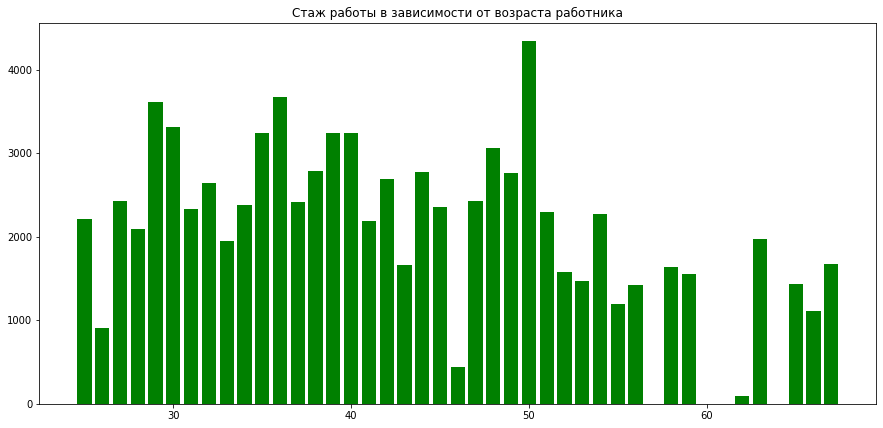

In [151]:
# Считаем коэффициент корреляции между возрастом и стажем работы в компании

# Создаем соединение с базой данных
import psycopg2
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
%matplotlib inline 


pg_connection = {
    "host": "dsstudents.skillbox.ru",
    "port": 5432,
    "dbname": "human_resources",
    "user": "readonly",
    "password": "6hajV34RTQfmxhS"
}
conn = psycopg2.connect(**pg_connection)
cursor = conn.cursor()

# Вычисляем коэффициент корреляции 
sql_str = '''SELECT corr(age, "Days Employed")
            FROM public.hr_dataset;            
            '''
cursor.execute(sql_str)
share_corr = [a for a in cursor.fetchall()][0][0]
print(r'Коэффициент корреляции между возрастом сотрудника и стажем работы составляет: {}'.format(round(share_corr,2)))

# выводим данные по возрасту и стажу по всем работникам в таблице hr_dataset
sql_str = '''SELECT age, "Days Employed"
            FROM public.hr_dataset;            
            '''
cursor.execute(sql_str)
share_corr1 = [a for a in cursor.fetchall()]

# Выводим данные в датафрейме по убыванию
df_corr = pd.DataFrame(share_corr1, columns=['age', 'days_employed'])
x = df_corr.loc[:, 'age']
y = df_corr.loc[:, 'days_employed']
# df_corr

plt.figure(figsize=(15, 7))
plt.title('Стаж работы в зависимости от возраста работника')
plt.bar(x, y, color = 'g')
plt.show()

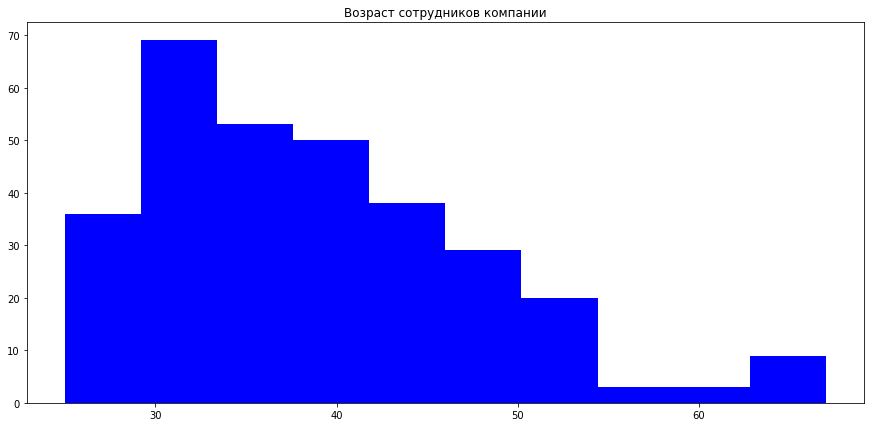

In [155]:
# Справочно
plt.figure(figsize=(15, 7))
plt.title('Возраст сотрудников компании')
x.hist(bins = 10, color = 'b')
plt.grid(False)
# plt.axis('off')

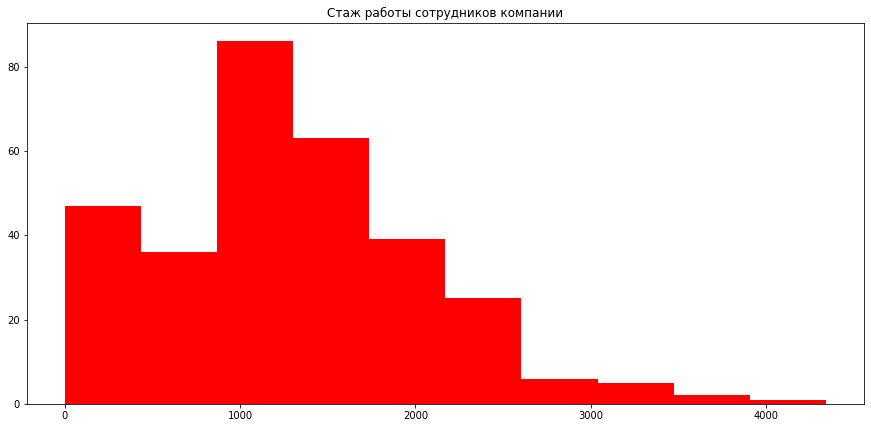

In [157]:
# Справочно
plt.figure(figsize=(15, 7))
plt.title('Стаж работы сотрудников компании')
y.hist(bins = 10, color = 'r')
plt.grid(False)

## Вывод
Гипотеза о наличие зависимости возраста сотрудника и стажа работы в компании не подтвердилась.

## Проверяем гипотезу: зависимость стажа от Performance Score

In [128]:
# Создаем соединение с базой данных
# Проверяем гипотезу зависимость стажа от Performance Score
import psycopg2
import pandas as pd
import sqlite3

pg_connection = {
    "host": "dsstudents.skillbox.ru",
    "port": 5432,
    "dbname": "human_resources",
    "user": "readonly",
    "password": "6hajV34RTQfmxhS"
}
conn = psycopg2.connect(**pg_connection)
cursor = conn.cursor()

sql_str = '''SELECT "Performance Score", count(id), avg(age), avg("Days Employed")
            FROM public.hr_dataset 
            GROUP BY "Performance Score"
            ORDER BY avg("Days Employed") DESC;            
            '''
cursor.execute(sql_str)
share_score = [a for a in cursor.fetchall()]
# print(share_score)

# Выводим данные в датафрейме
marks = ['performance_score','count', 'avg_age', 'avg_days_employed']
df_score = pd.DataFrame(share_score, columns=marks)

df_score.loc[:, 'avg_age'] = df_score.loc[:, 'avg_age'].map(int)
df_score.loc[:, 'avg_days_employed'] = df_score.loc[:, 'avg_days_employed'].map(int)
df_score

,performance_score,count,avg_age,avg_days_employed
0,Exceptional,9,38,1701
1,Exceeds,28,40,1627
2,PIP,9,40,1426
3,Fully Meets,181,39,1405
4,Needs Improvement,15,35,1365
5,90-day meets,31,37,1055
6,N/A- too early to review,37,35,552


## Вывод
1. Проверка гипотезы улучшения показателя Performance Score от стажа в основном подтвердилась. В вышеприведенной таблице отражена динамика показателя Performance Score совместно со средней продолжительностью работы в компании.
2. С ростом стажа улучшается и характеристика показателя Performance Score, но есть и исключения. Присутствуют 9 человек (из 310), которые отработали в компании около 1426 дней, но их профессиональные качества поставлены под сомнения (PIP - Performance Improvement Plan).

## Особое замечание. Анализ грейдов зарплат в компании.

In [191]:
# Смотрим таблицу salary_grid
df_sal = pd.read_sql_query('''select * from salary_grid;''', conn)
df_sal

,id,Position,Salary Min,Salary Mid,Salary Max,Hourly Min,Hourly Mid,Hourly Max
0,1,Administrative Assistant,30000,40000,50000,14.42,19.23,24.04
1,2,Sr. Administrative Assistant,35000,45000,55000,16.83,21.63,26.44
2,3,Accountant I,42274,51425,62299,20.32,24.72,29.95
3,4,Accountant II,50490,62158,74658,24.27,29.88,35.89
4,5,Sr. Accountant,63264,76988,92454,30.42,37.01,44.45
5,6,Network Engineer,50845,66850,88279,24.44,32.14,42.44
6,7,Sr. Network Engineer,79428,99458,120451,38.19,47.82,57.91
7,8,Database Administrator,50569,68306,93312,24.31,32.84,44.86
8,9,Sr. DBA,92863,116007,139170,44.65,55.77,66.91
9,10,Production Technician I,30000,40000,50000,14.42,19.23,24.04


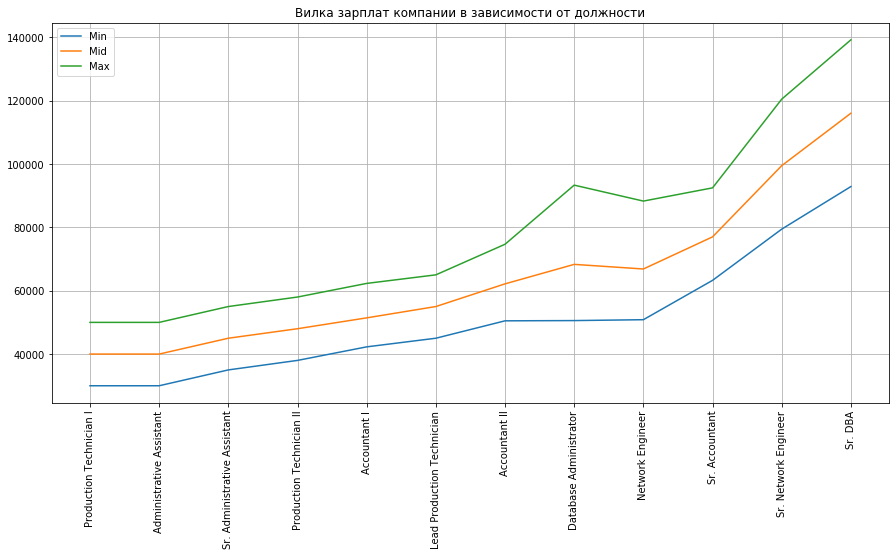

In [190]:
# Строим графики зарплат
plt.figure(figsize=(15, 7))
plt.title('Вилка зарплат компании в зависимости от должности')
x = df_sal.loc[:, 'Position']
y1 = df_sal.loc[:, 'Salary Min']
y2 = df_sal.loc[:, 'Salary Mid']
y3 = df_sal.loc[:, 'Salary Max']

plt.plot(x, y1, label='Min')
plt.plot(x, y2, label='Mid')
plt.plot(x, y3, label='Max')
plt.xticks(rotation='vertical')
plt.legend()
plt.grid(True) 

## Вывод
Анализ грейдов по зарплатам выявил серьезную мотивационную и методологическую ошибку. В позициях, которые являются стартовой для следующей позиции некорректно, что Salary Max была выше Salary Min более высокой позиции. 
Это отчетливо видно в следующем примере: Administrative Assistant и Sr. Administrative Assistant. 
Здесь Salary Max у Administrative Assistant выше, чем Salary Min у Sr. Administrative Assistant (50000 и 35000 соответственно). Это абсолютно неприемлемо с точки зрения мотивации. Максимальная сумма зарплаты у сотрудника нижестоящей должности не должна превышать даже минимальную зарплату у сотрудника вышестоящей должности. 
Такие случаи также проявляются у Accountant I, Accountant II, Sr. Accountant; Network Engineer, Sr. Network Engineer; Production Technician I, Production Technician II, Lead Production Technician.
Рекомендации для HR отдела: значения грейдов желательно изменить для устранения мотивационных ошибок.

Все, что ниже не смотрим.

In [107]:
# sql_str = '''SELECT age, sex, "Days Employed", department, position, "Manager Name", 
# "Employee Source", "Performance Score" FROM public.hr_dataset WHERE "Employment Status" = 'Active';'''
# cursor.execute(sql_str)
# staff_active = [a for a in cursor.fetchall()]

# # print("Расшифровка: %s" % staff_active)

# # Выводим данные в датафрейме
# marks = ['age', 'sex', 'days_employed', 'department', 'position', 'manager_name', 'employee_source', 'performance_score']
# df_staff_active = pd.DataFrame(staff_active, columns=marks)
# df_staff_active.head(50)

In [106]:
# # Смотрим таблицу production_staff

# df_pr = pd.read_sql_query("select * from production_staff;", conn)
# # df_pr = pd.read_sql_query('select "Pay" from production_staff;', conn)
# # df_pr.tail(73)
# df_pr.loc[187]

In [105]:
# # Создаем соединение с базой данных
# import psycopg2
# import pandas as pd
# import sqlite3

# pg_connection = {
#     "host": "dsstudents.skillbox.ru",
#     "port": 5432,
#     "dbname": "human_resources",
#     "user": "readonly",
#     "password": "6hajV34RTQfmxhS"
# }
# conn = psycopg2.connect(**pg_connection)
# cursor = conn.cursor()

# # Делаем запрос на количество строк в таблице production_staff
# # для подсчета общего количества сотрудников
# sql_str = '''SELECT count(*) 
# FROM production_staff
# WHERE "Employee Name" is not Null;'''
# cursor.execute(sql_str)
# staff_production = [a for a in cursor.fetchall()][0][0]
# # conn.commit()

# # Запрашиваем статус сотрудников и делаем сортировку по убыванию 
# sql_str = r'SELECT "Employment Status", count("Employment Status") as c, count("Employment Status")*100/{} FROM production_staff GROUP BY "Employment Status" ORDER BY c DESC;'.format(staff_production)
# # sql_str = r'SELECT count("Employment Status")/{} FROM public.hr_dataset;'.format(staff)
# cursor.execute(sql_str)
# status_staff_production = [a for a in cursor.fetchall()]
# # status_staff_1 = float(status_staff[0][2])
# # print(status_staff_1)


# print("Общее количество сотрудников: %s" % staff_production)
# print("Статус сотрудников и их количество: %s" % status_staff_production)

# # Выводим данные в датафрейме по убыванию
# df_staff_production = pd.DataFrame(status_staff_production, columns=['status', 'count', 'percentage']).sort_values('count', ascending=False)
# # df_staff = pd.DataFrame(status_staff, columns=['status'])
# # df_staff.loc[:, 'percentage'] = round(df_staff.loc[:, 'count'] / staff * 100, 2)
# df_staff_production

In [103]:
# # Создаем соединение с базой данных
# import psycopg2
# import pandas as pd
# import sqlite3

# pg_connection = {
#     "host": "dsstudents.skillbox.ru",
#     "port": 5432,
#     "dbname": "human_resources",
#     "user": "readonly",
#     "password": "6hajV34RTQfmxhS"
# }
# conn = psycopg2.connect(**pg_connection)
# cursor = conn.cursor()

# # Делаем запрос на количество строк в таблице production_staff
# # для подсчета общего количества сотрудников
# # sql_str = "SELECT count(*) FROM production_staff;"
# # cursor.execute(sql_str)
# # staff_production = [a for a in cursor.fetchall()][0][0]
# # conn.commit()

# #  

# sql_str = r'''SELECT production_staff."Employee Name", production_staff.id, hr_dataset."Employee Name" 
# FROM production_staff 
# LEFT JOIN hr_dataset 
# ON hr_dataset."Employee Name" = production_staff."Employee Name"
# WHERE production_staff."Employment Status" = 'Active'
# AND hr_dataset."Employment Status" = 'Active';'''

# cursor.execute(sql_str)
# i = 1
# # staff_production = [print(i, a) for a in cursor.fetchall() if a[0] != None]

# for a in cursor.fetchall():
#     if a[0] != None:
#         print(i, a)
#         i += 1

# # print("Имя: %s" % staff_production)

# # Выводим данные в датафрейме по убыванию
# # df_staff_production = pd.DataFrame(status_staff_production, columns=['status', 'count', 'percentage']).sort_values('count', ascending=False)
# # df_staff = pd.DataFrame(status_staff, columns=['status'])
# # df_staff.loc[:, 'percentage'] = round(df_staff.loc[:, 'count'] / staff * 100, 2)
# # df_staff_production

In [104]:
# # Создаем соединение с базой данных
# import psycopg2
# import pandas as pd
# import sqlite3

# pg_connection = {
#     "host": "dsstudents.skillbox.ru",
#     "port": 5432,
#     "dbname": "human_resources",
#     "user": "readonly",
#     "password": "6hajV34RTQfmxhS"
# }
# conn = psycopg2.connect(**pg_connection)
# cursor = conn.cursor()

# #  
# # sql_str = r'''SELECT hr_dataset."Employee Name", hr_dataset.id, production_staff."Employee Name" 
# # FROM hr_dataset 
# # JOIN production_staff
# # ON hr_dataset."Employee Name" = production_staff."Employee Name"
# # WHERE hr_dataset."Employment Status" = 'Active';'''


# sql_str = r'''SELECT hr_dataset."Employee Name", hr_dataset.id, production_staff."Employee Name"
# FROM hr_dataset 
# LEFT JOIN production_staff
# ON hr_dataset."Employee Name" = production_staff."Employee Name"
# WHERE hr_dataset."Employment Status" = 'Active'
# AND hr_dataset.department = 'Production       ';'''

# cursor.execute(sql_str)
# i = 1

# for a in cursor.fetchall():
#     if a[0] != None:
#         print(i, a)
#         i += 1

In [72]:
# Смотрим данные уволившегося Monkfish, Erasumus
# a = df_hr.loc[df_hr['Employee Name'] == 'Monkfish, Erasumus', 'id']
# a = df_hr.loc[df_hr['Employee Name'] == 'King, Janet', 'id']
# a = df_pr.loc[df_pr['Employee Name'] == 'Monkfish, Erasumus', 'id']
# df_pr['Employee Name'][200:250]
# df_hr.loc[int(a)-1]
# df_pr.loc[int(a)-1]

In [108]:
# # Смотрим данные уволившегося Monkfish, Erasumus
# a = df_hr.loc[df_hr['Employee Name'] == 'Monkfish, Erasumus', 'id']
# # a = df_hr.loc[df_hr['Employee Name'] == 'King, Janet', 'id']
# df_hr.loc[int(a)-1]

In [112]:
# # Делаем запрос к публичным таблицам и смотрим их название
# sql_str = "SELECT table_name FROM information_schema.tables WHERE table_schema='public';"
# # sql_str = "SELECT * FROM information_schema.tables WHERE table_schema='public';"

# cursor.execute(sql_str)
# tables_data = [a for a in cursor.fetchall()]
# conn.commit()

# print("Какие таблицы есть в базе: %s" % tables_data)

In [113]:
# # Проверка запроса. Просто смотрим первую строку.
# sql_str = "SELECT * FROM public.hr_dataset LIMIT 1;"


# cursor.execute(sql_str)
# tables_data = [a for a in cursor.fetchall()]
# conn.commit()

# print("вывод строк: %s" % tables_data)

In [114]:
# # Делаем запрос на количество строк в таблице production_staff
# sql_str = "SELECT count(*) FROM public.production_staff;"
# cursor.execute(sql_str)
# tables_data = [a for a in cursor.fetchall()]
# # conn.commit()

# print("вывод строк: %s" % tables_data)

In [115]:
# # Делаем запрос на количество строк в таблице recruiting_costs
# sql_str = "SELECT count(*) FROM public.recruiting_costs;"
# cursor.execute(sql_str)
# tables_data = [a for a in cursor.fetchall()]
# # conn.commit()

# print("вывод строк: %s" % tables_data)

In [116]:
# # Делаем запрос на количество строк в таблице salary_grid
# sql_str = "SELECT count(*) FROM public.salary_grid;"
# cursor.execute(sql_str)
# tables_data = [a for a in cursor.fetchall()]
# # conn.commit()

# print("вывод строк: %s" % tables_data)

In [117]:
# # Вывод названий столбцов таблицы hr_dataset.
# # Создаем соединение с базой данных
# import psycopg2
# import pandas as pd
# import sqlite3

# pg_connection = {
#     "host": "dsstudents.skillbox.ru",
#     "port": 5432,
#     "dbname": "human_resources",
#     "user": "readonly",
#     "password": "6hajV34RTQfmxhS"
# }
# conn = psycopg2.connect(**pg_connection)
# cursor = conn.cursor()

# sql_str = 'Select * FROM public.hr_dataset LIMIT 0;'

# cursor.execute(sql_str)
# colnames = [print(a[0]) for a in cursor.description]
# conn.commit()

# # print("Названия колонок: %s" % colnames)

In [124]:
# # Вывод названий столбцов таблицы recruiting_costs.
# sql_str = 'Select * FROM public.recruiting_costs LIMIT 0;'

# cursor.execute(sql_str)
# colnames = [a[0] for a in cursor.description]
# conn.commit()

# print("Названия колонок: %s" % colnames)

In [125]:
# # Вывод названий столбцов таблицы production_staff.
# sql_str = 'Select * FROM public.production_staff LIMIT 0;'

# cursor.execute(sql_str)
# colnames = [a[0] for a in cursor.description]
# conn.commit()

# print("Названия колонок: %s" % colnames)

In [126]:
# # Вывод названий столбцов таблицы salary_grid.
# sql_str = 'Select * FROM public.salary_grid LIMIT 0;'

# cursor.execute(sql_str)
# colnames = [a[0] for a in cursor.description]
# # conn.commit()

# print("Названия колонок: %s" % colnames)

## Часть вторая

Перед вами стоит задача – подготовить аналитический ответ для SMM-отдела компании Skillbox. <br> Объектом анализа является  [паблик Skillbox Вконтакте](https://vk.com/skillbox_education). <br> <br> 
Подключитесь к  API VK и выгрузите посты со стены паблика Skillbox за интересующий период (определите самостоятельно и обоснуйте). Проанализируйте влияние различных факторов (например, времени публикации) на вовлеченность пользователей (количество лайков, комментариев, голосов в опросах). Сделайте аналитику по рубрикам (примеры рубрик: дизайн-битва, игра по управлению), которые есть в паблике. Выбрать нужные посты можно с помощью регулярных выражений. Составьте перечень рекомандаций для SMM-отдела по итогам анализа. <br> <br> 

Дополнительные инструкции по работе с API VK расположены [здесь](https://nbviewer.jupyter.org/github/vikaborel/dstutorials/blob/master/Дополнительные%20инструкции.ipynb).

In [0]:
### YOUR CODE HERE ###


